# HR Analytics Project

## Data Description

* HR Analytics:

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

* Attrition in HR:

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

* Attrition affecting Companies:

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Our task is to predict the attrition and  find out the factors affecting attrition of employees.

This dataset contains 1470 rows and 35 columns.

   'Age','Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager' 
       are the columns in the dataset.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics  import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')


## Loading the Dataset

In [2]:
df=pd.read_csv("hr_analytics.csv")
df.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
#Checking the dimension of the dataset
df.shape

(1470, 35)

* This dataset contains 1470 rows and 35 columns

In [7]:
#Statistical summary
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [8]:
# Checking the null values in the dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

* '0' indicates that there is no null values in the dataset.

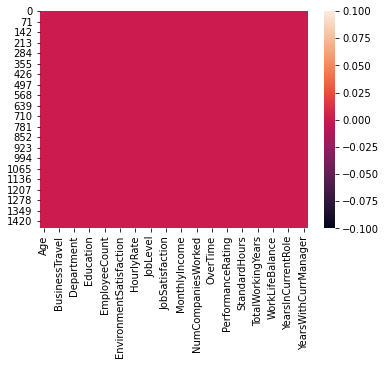

In [9]:
sns.heatmap(df.isnull())

* From the above plot it is clear that there is no NaN values in this dataset.

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

*    The number of employees who left the company are "237" and the number of employees who continuing in the company are "1233".

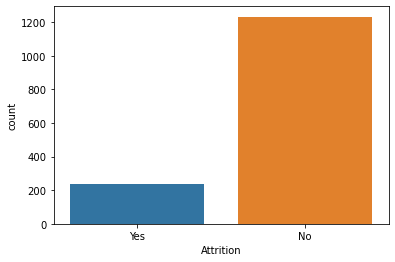

In [11]:
sns.countplot(df["Attrition"])
plt.show()

## Data Visualization

### Univariate analysis of numeric variables

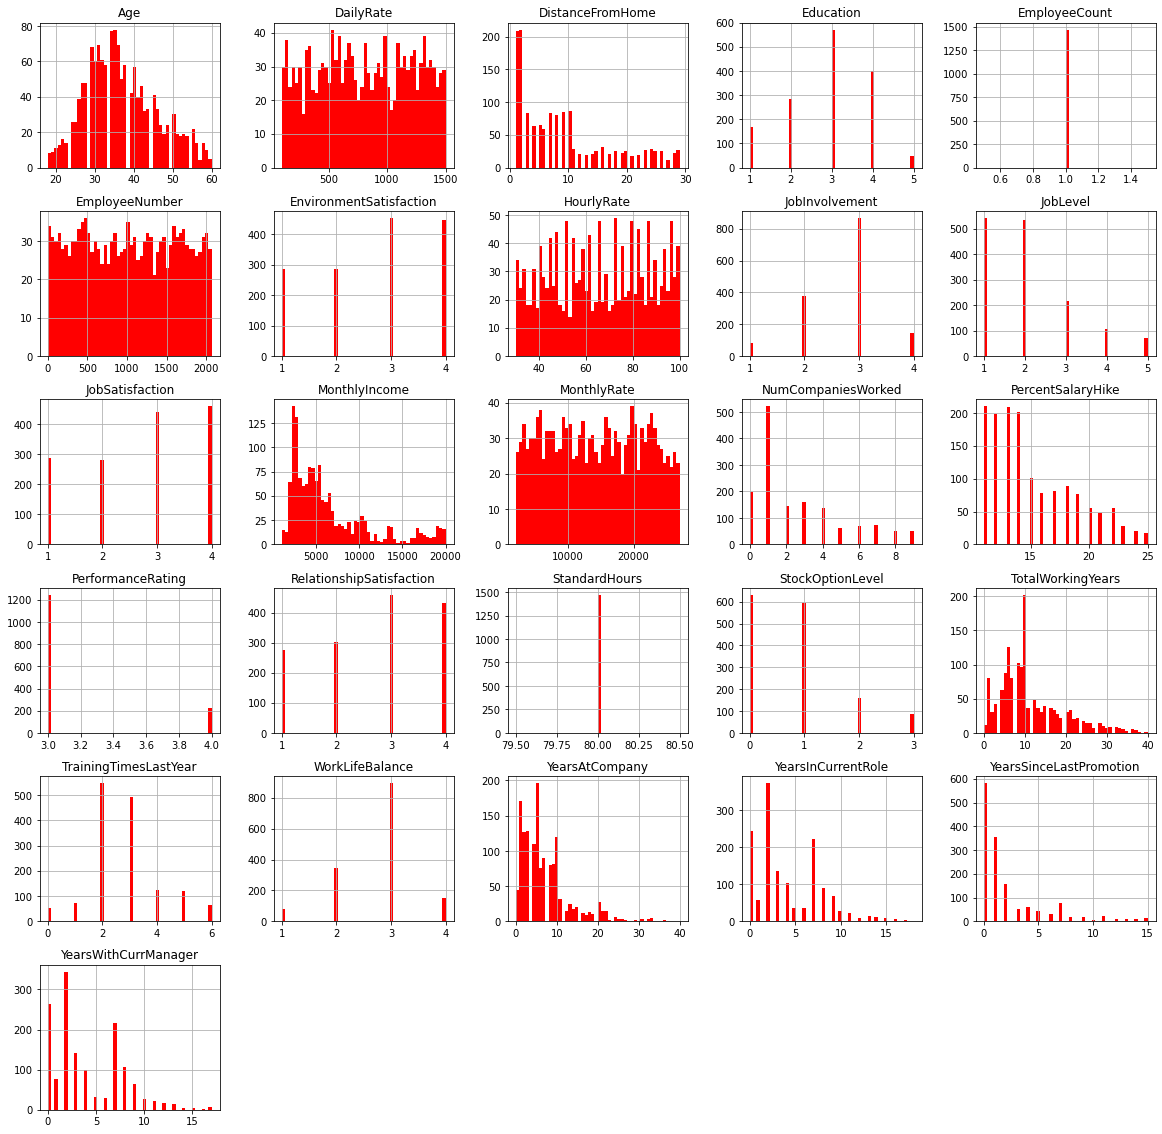

In [12]:
df.hist(bins=50,figsize=(20,20),color='r')
plt.show()

### Conclusions from the graph

* Number of employees between the age 29 and 40 are higher in number.

* Majority of the employees have shorter distance from home to work place.

* More than 500 employees have level 3 education. number of employees who have level 5 education is very less.

* The total number of employees are 1470.

* Most of the employees are satisfied with the working environment.

* Job involvement is maximum at 3, more than 800 employees belong to this class

* Employees who have satisfaction on their job is maximum in number.

* Majority of the employees belongs to the joblevel 1 and 2.less number of employees are in the level 3,4,5.

* only few employees are getting goog income.most of the employees are getting income in the range 1000 to 5000

* most of the employees(above 500) worked in another company before joining in this company.this is the second company of majority of the employees.

* For majority of the employees salary hike is between 11 and 15 .only few number of employees got salary hike above 15%.

* Most of the employees (>1200) employees got the performance rate 3.0. the number of employees who got the rating 4 is very less(<250)

* Majority of the employees  are satisfied with their relationship.

* For all the employees working hours is same (80.00)

* The most of the employees have total working years =10.

* Most of the employee have good work life balance.

* Only few employees are working in the same company more than 10 years

* Most of the employees are in the current role from 2 years.

* Majority of the employees got promotion one year before. only few employees are not getting promotion from the past 10 to 15 years.

### Univariate analysis of Categoric variables

In [13]:
var1=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

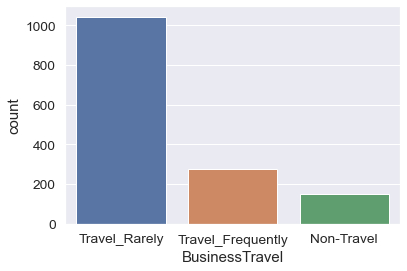

In [14]:
sns.set(font_scale=1.25)
sns.countplot(df['BusinessTravel'])
df['BusinessTravel'].value_counts()

* Among 1470 employees more than 1043 employees are travelling rarely. 277 people wants to travel frequently.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

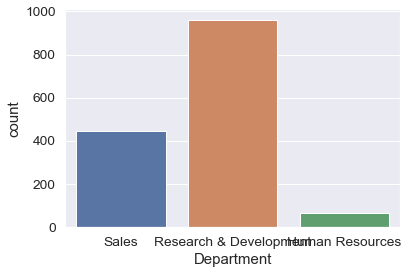

In [15]:
sns.countplot(df['Department'])
df['Department'].value_counts()

* Most of the employees are working in  the department "Research and Develpoment".Second most employees are working with sales.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

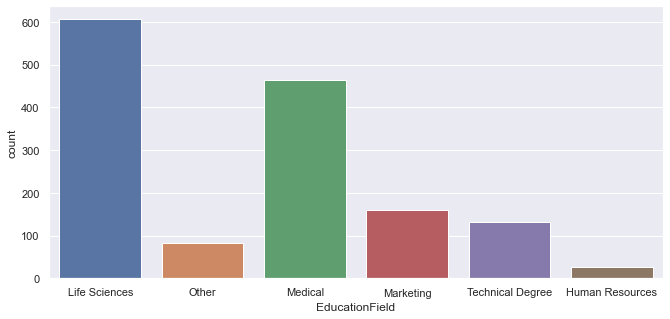

In [16]:
sns.set(font_scale=1)
plt.figure(figsize=(11,5))
sns.countplot(df['EducationField'])
df['EducationField'].value_counts()

* The field of education of most of the employees ---> Life Sciences

  Second most ---> Medical

* The employees in the field Human Resources is only 27.

Male      882
Female    588
Name: Gender, dtype: int64

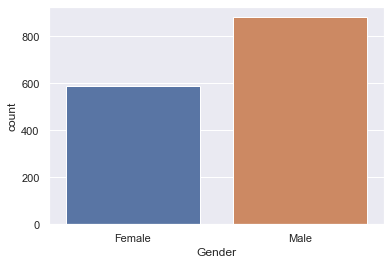

In [17]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()

* Among the employees majority are males.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

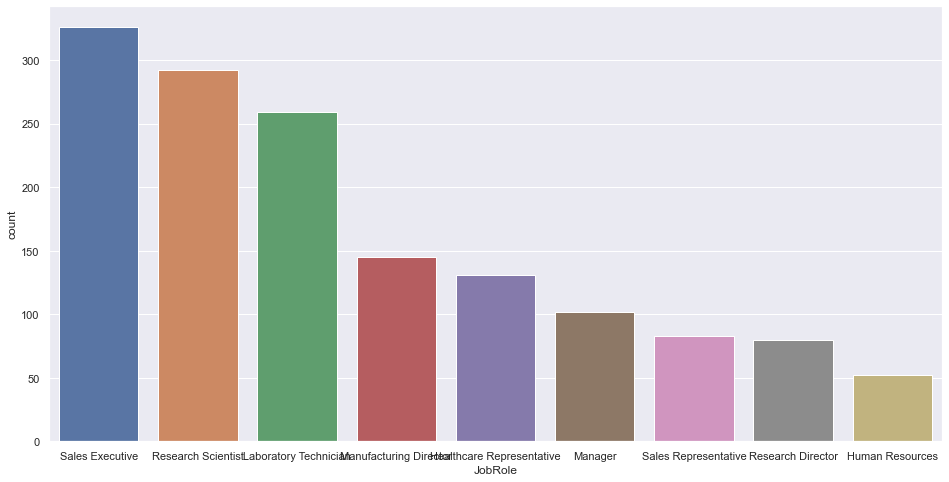

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(df['JobRole'])
df['JobRole'].value_counts()

* Most of the employees are working as sales executive.250 above research scientists and laboratory technicians are working there.The number of employees are minimum in the HR department.

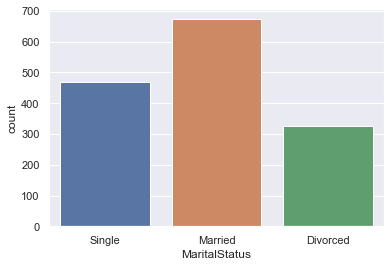

In [19]:
sns.countplot(df['MaritalStatus'])
plt.show()

* we can infer that most of the employees are married.

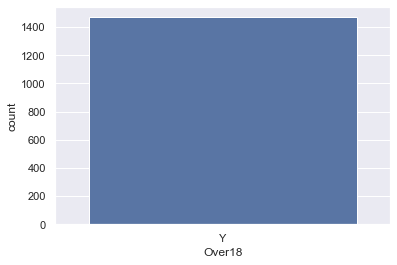

In [20]:
sns.countplot(df['Over18'])
plt.show()

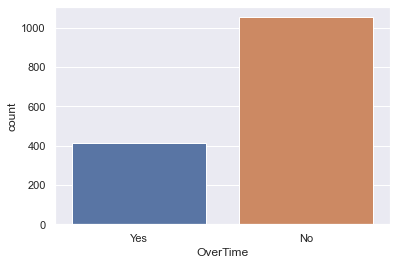

In [21]:
sns.countplot(df['OverTime'])
plt.show()

* Most of the employees are not doing overtime.

### Bivariate Analysis

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
var1=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

In [24]:
def plotcountgraph(var1):
    
    sns.set(font_scale=.75)
    plt.figure(figsize=(15,8))
    ax=sns.countplot(x=var1,hue='Attrition',data=df)
    plt.setp(ax.get_xticklabels(),rotation=0)

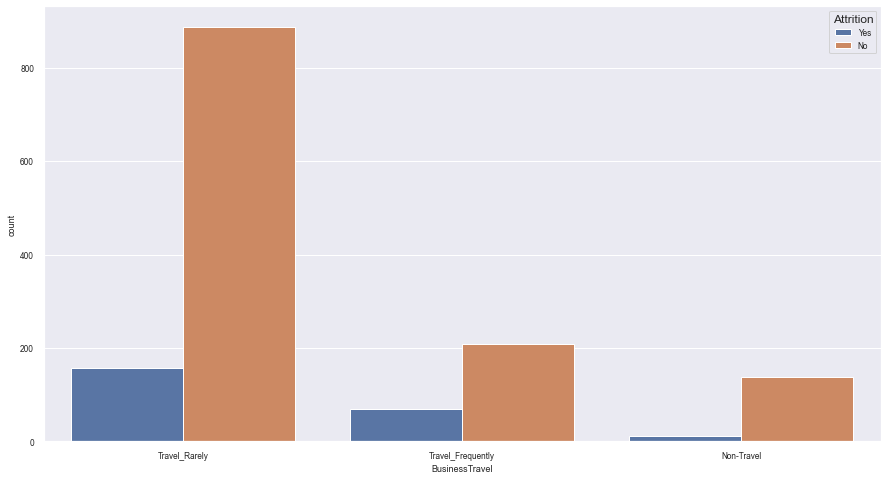

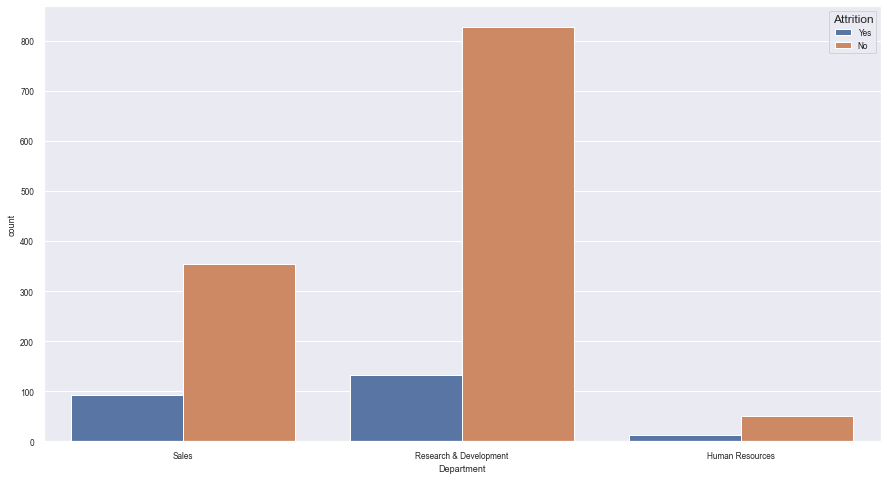

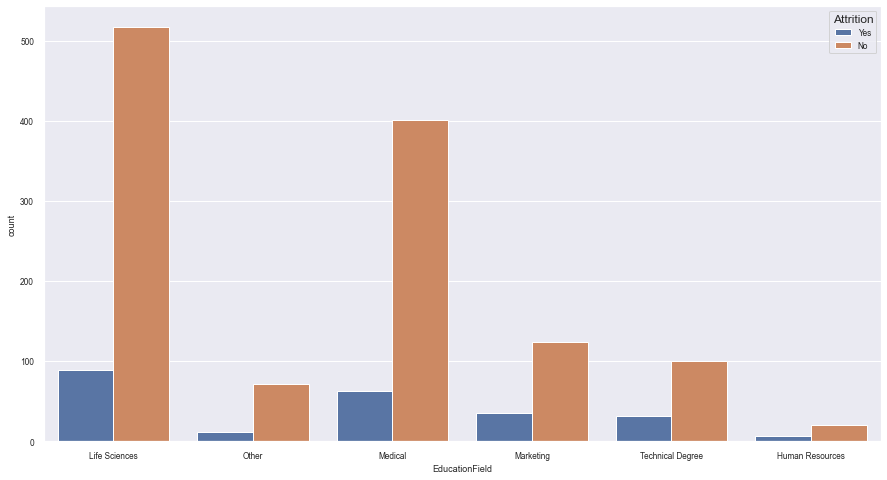

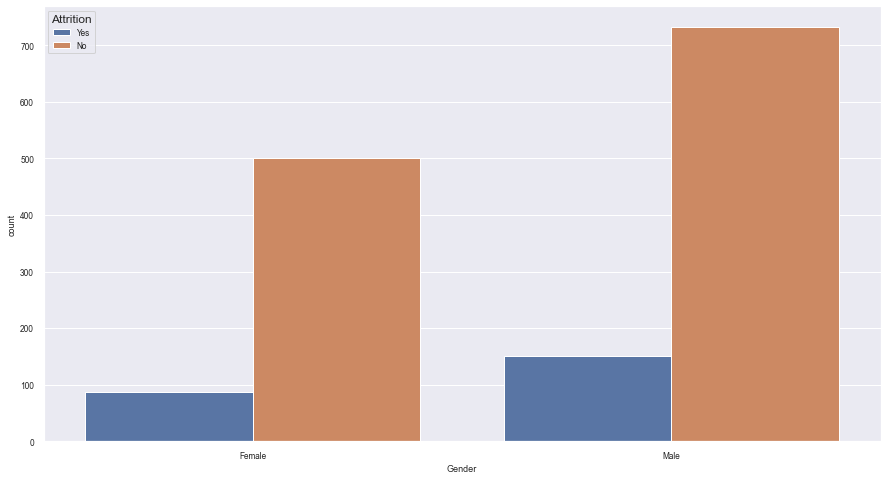

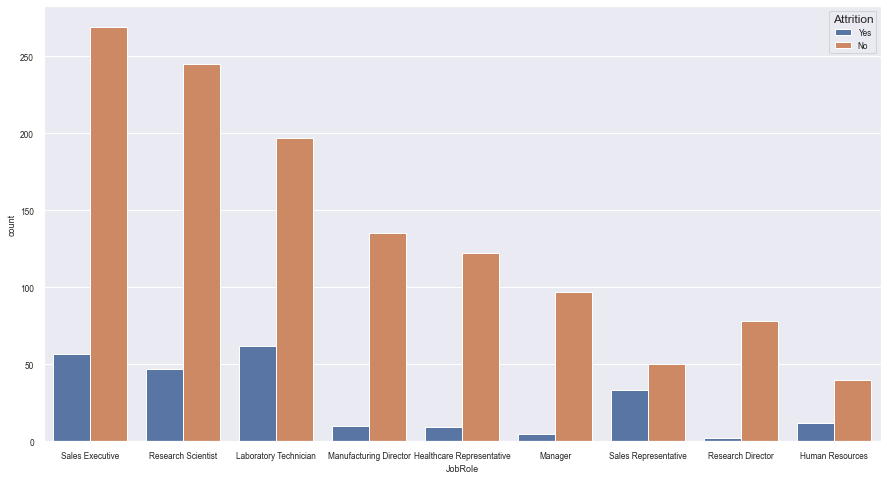

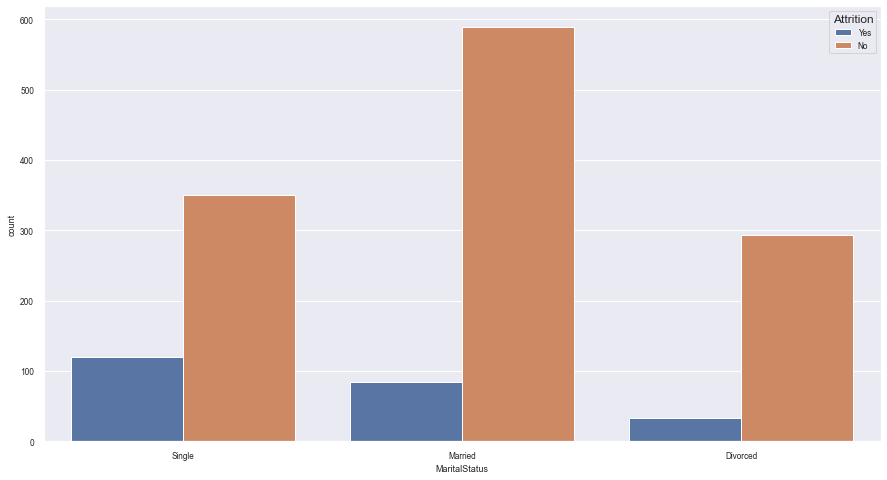

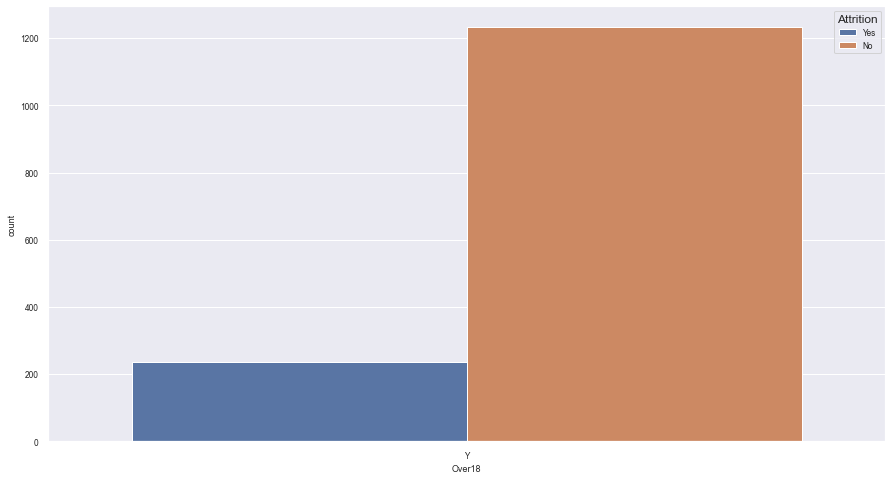

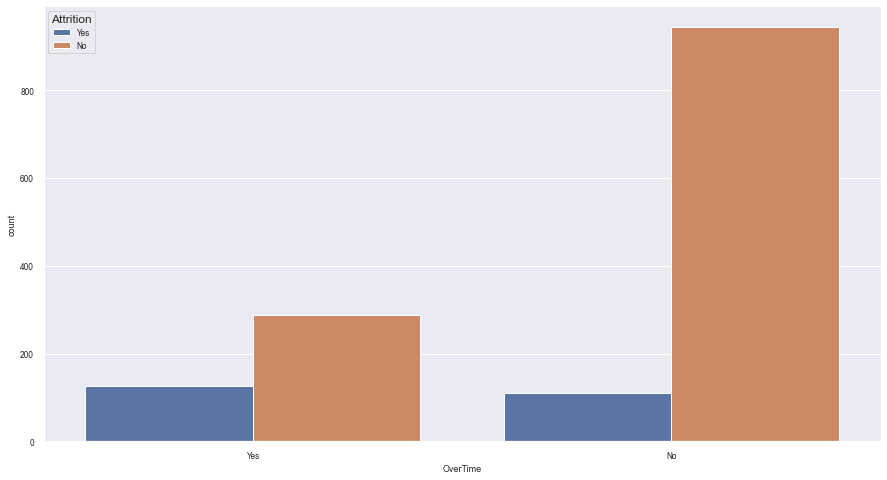

In [25]:
for i in var1:
    plotcountgraph(i)

### Conclusions from the graph

* From the graph it is clear that majority of the employees are reamaining in the company,only few left the company.
  and we can observe that among left employees majority used to travel rarely.So we can infer that they left the company not because of the travelling reasons.

* Maximum number of people who left the company are from the department Research & Development.second maximum is from the Sales department.

* Most of the employees who left from the company have education in the field of Life Science.

* Compared to Females,Male employees are leaving the company more in number.

* Majority of the employees who left from the company are Laboratory Technicians and the second most sales executives.

* majority of the employees who left from the company are Single.Most of the employees who remaining in the company are Married people.
   From this trend we can infer that employees who have more responsibilities with the family are remaining in the company.

* From the graph of OverTime it is clear that maximum number of employees who have overtime not left the company.only few employees who are doing overtime left the company.The number of employees who have overtime and left from the company are almost same with the number of employees who haven't overtime and left from the company.

In [26]:
var2=['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

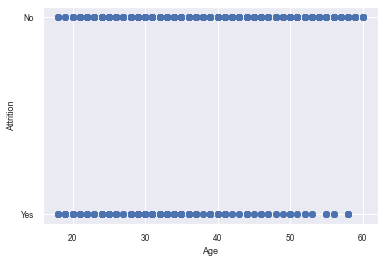

<Figure size 1440x720 with 0 Axes>

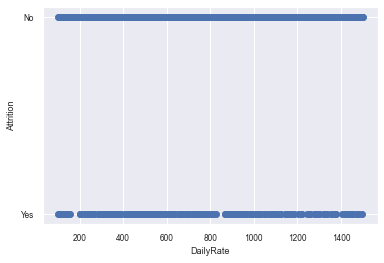

<Figure size 1440x720 with 0 Axes>

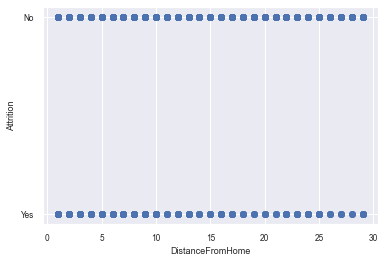

<Figure size 1440x720 with 0 Axes>

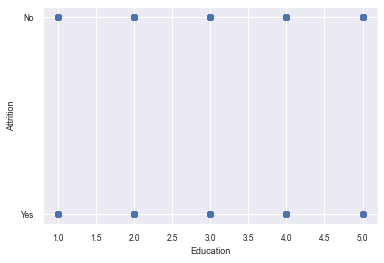

<Figure size 1440x720 with 0 Axes>

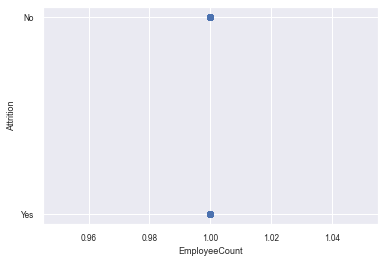

<Figure size 1440x720 with 0 Axes>

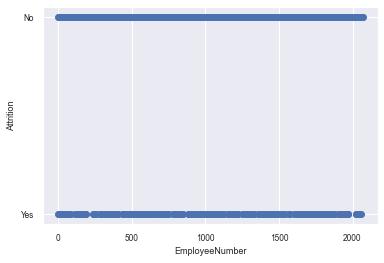

<Figure size 1440x720 with 0 Axes>

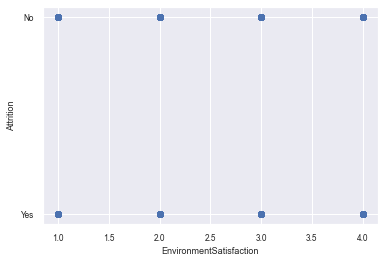

<Figure size 1440x720 with 0 Axes>

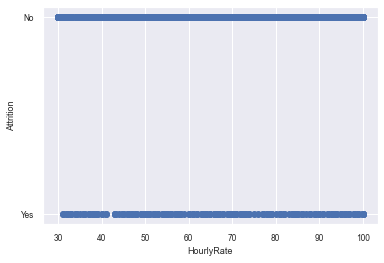

<Figure size 1440x720 with 0 Axes>

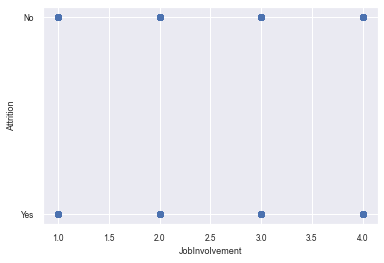

<Figure size 1440x720 with 0 Axes>

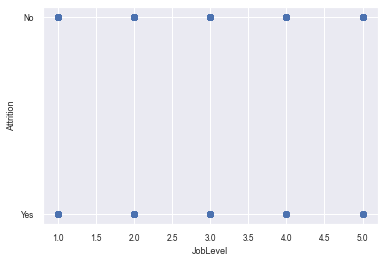

<Figure size 1440x720 with 0 Axes>

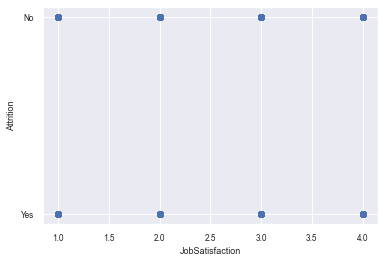

<Figure size 1440x720 with 0 Axes>

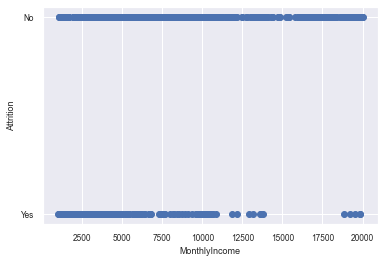

<Figure size 1440x720 with 0 Axes>

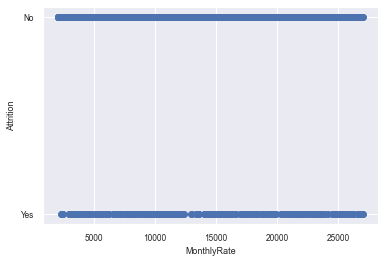

<Figure size 1440x720 with 0 Axes>

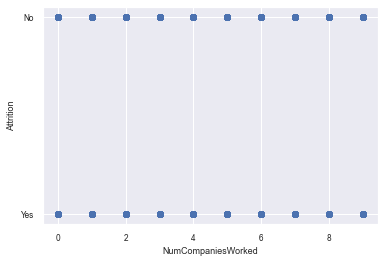

<Figure size 1440x720 with 0 Axes>

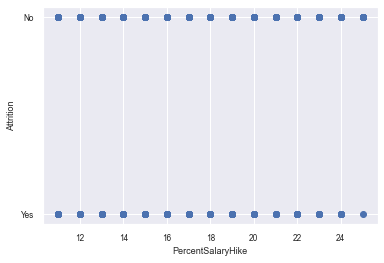

<Figure size 1440x720 with 0 Axes>

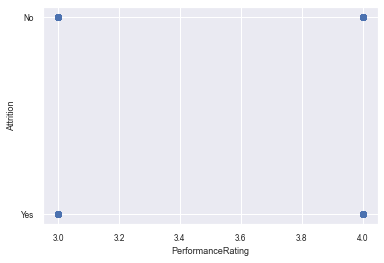

<Figure size 1440x720 with 0 Axes>

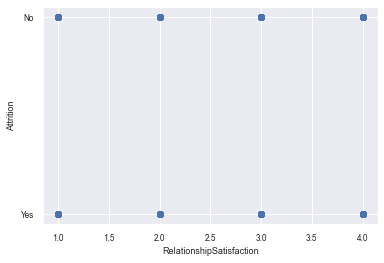

<Figure size 1440x720 with 0 Axes>

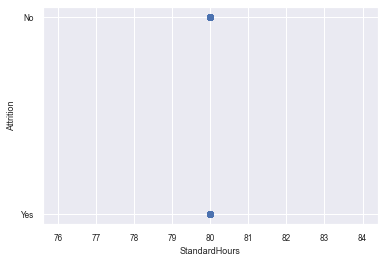

<Figure size 1440x720 with 0 Axes>

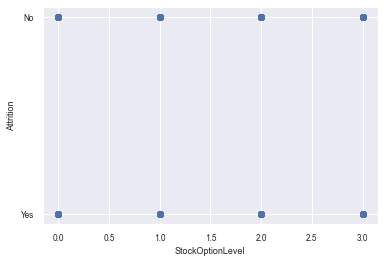

<Figure size 1440x720 with 0 Axes>

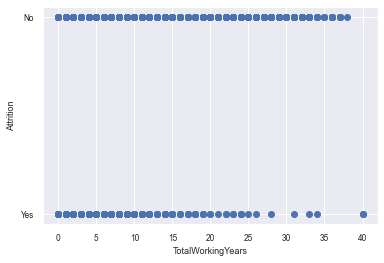

<Figure size 1440x720 with 0 Axes>

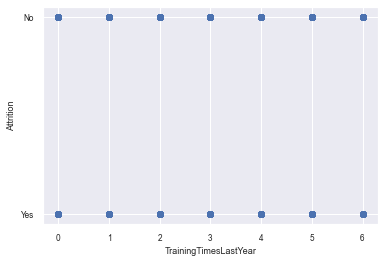

<Figure size 1440x720 with 0 Axes>

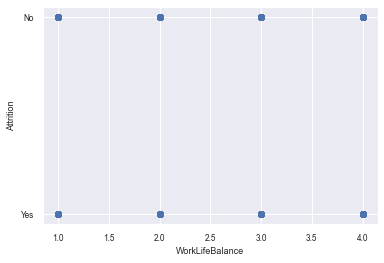

<Figure size 1440x720 with 0 Axes>

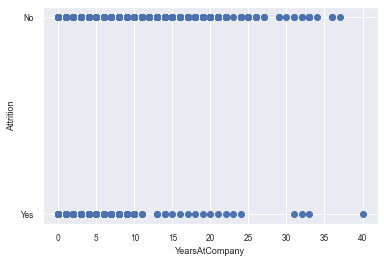

<Figure size 1440x720 with 0 Axes>

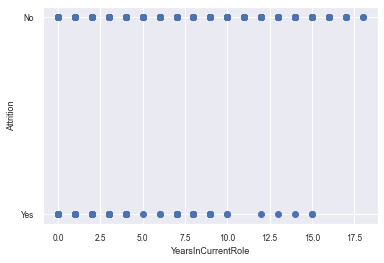

<Figure size 1440x720 with 0 Axes>

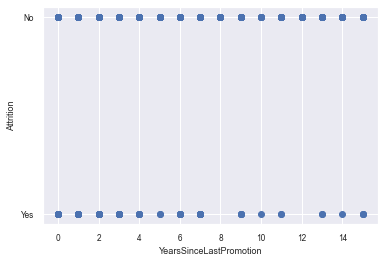

<Figure size 1440x720 with 0 Axes>

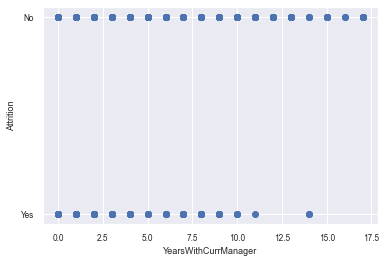

<Figure size 1440x720 with 0 Axes>

In [27]:
for i in var2:
    plt.scatter(df[i],df['Attrition'])
    plt.xlabel(i)
    plt.ylabel('Attrition')
    plt.figure(figsize=[20,10])
    plt.show()

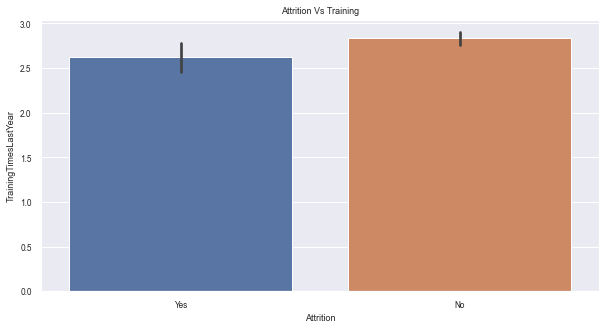

In [28]:
plt.figure(figsize=(10,5))
plt.title('Attrition Vs Training')
sns.barplot(x='Attrition',y='TrainingTimesLastYear',data=df)
plt.show()

* The employees who got training more than 2 times left the company.This creates loss for the company

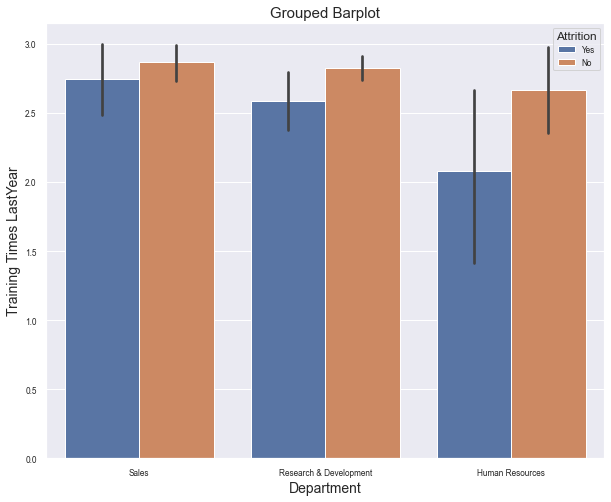

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(x="Department",
            y="TrainingTimesLastYear",
            hue="Attrition",
            data=df)
plt.ylabel("Training Times LastYear",size=14)
plt.xlabel("Department",size=14)
plt.title("Grouped Barplot",size=15)
plt.show()

* In the HR department employees who got training more than two times in the last year left the company.in HR department more Trained employees left compared to others.

### Multivariate Analysis

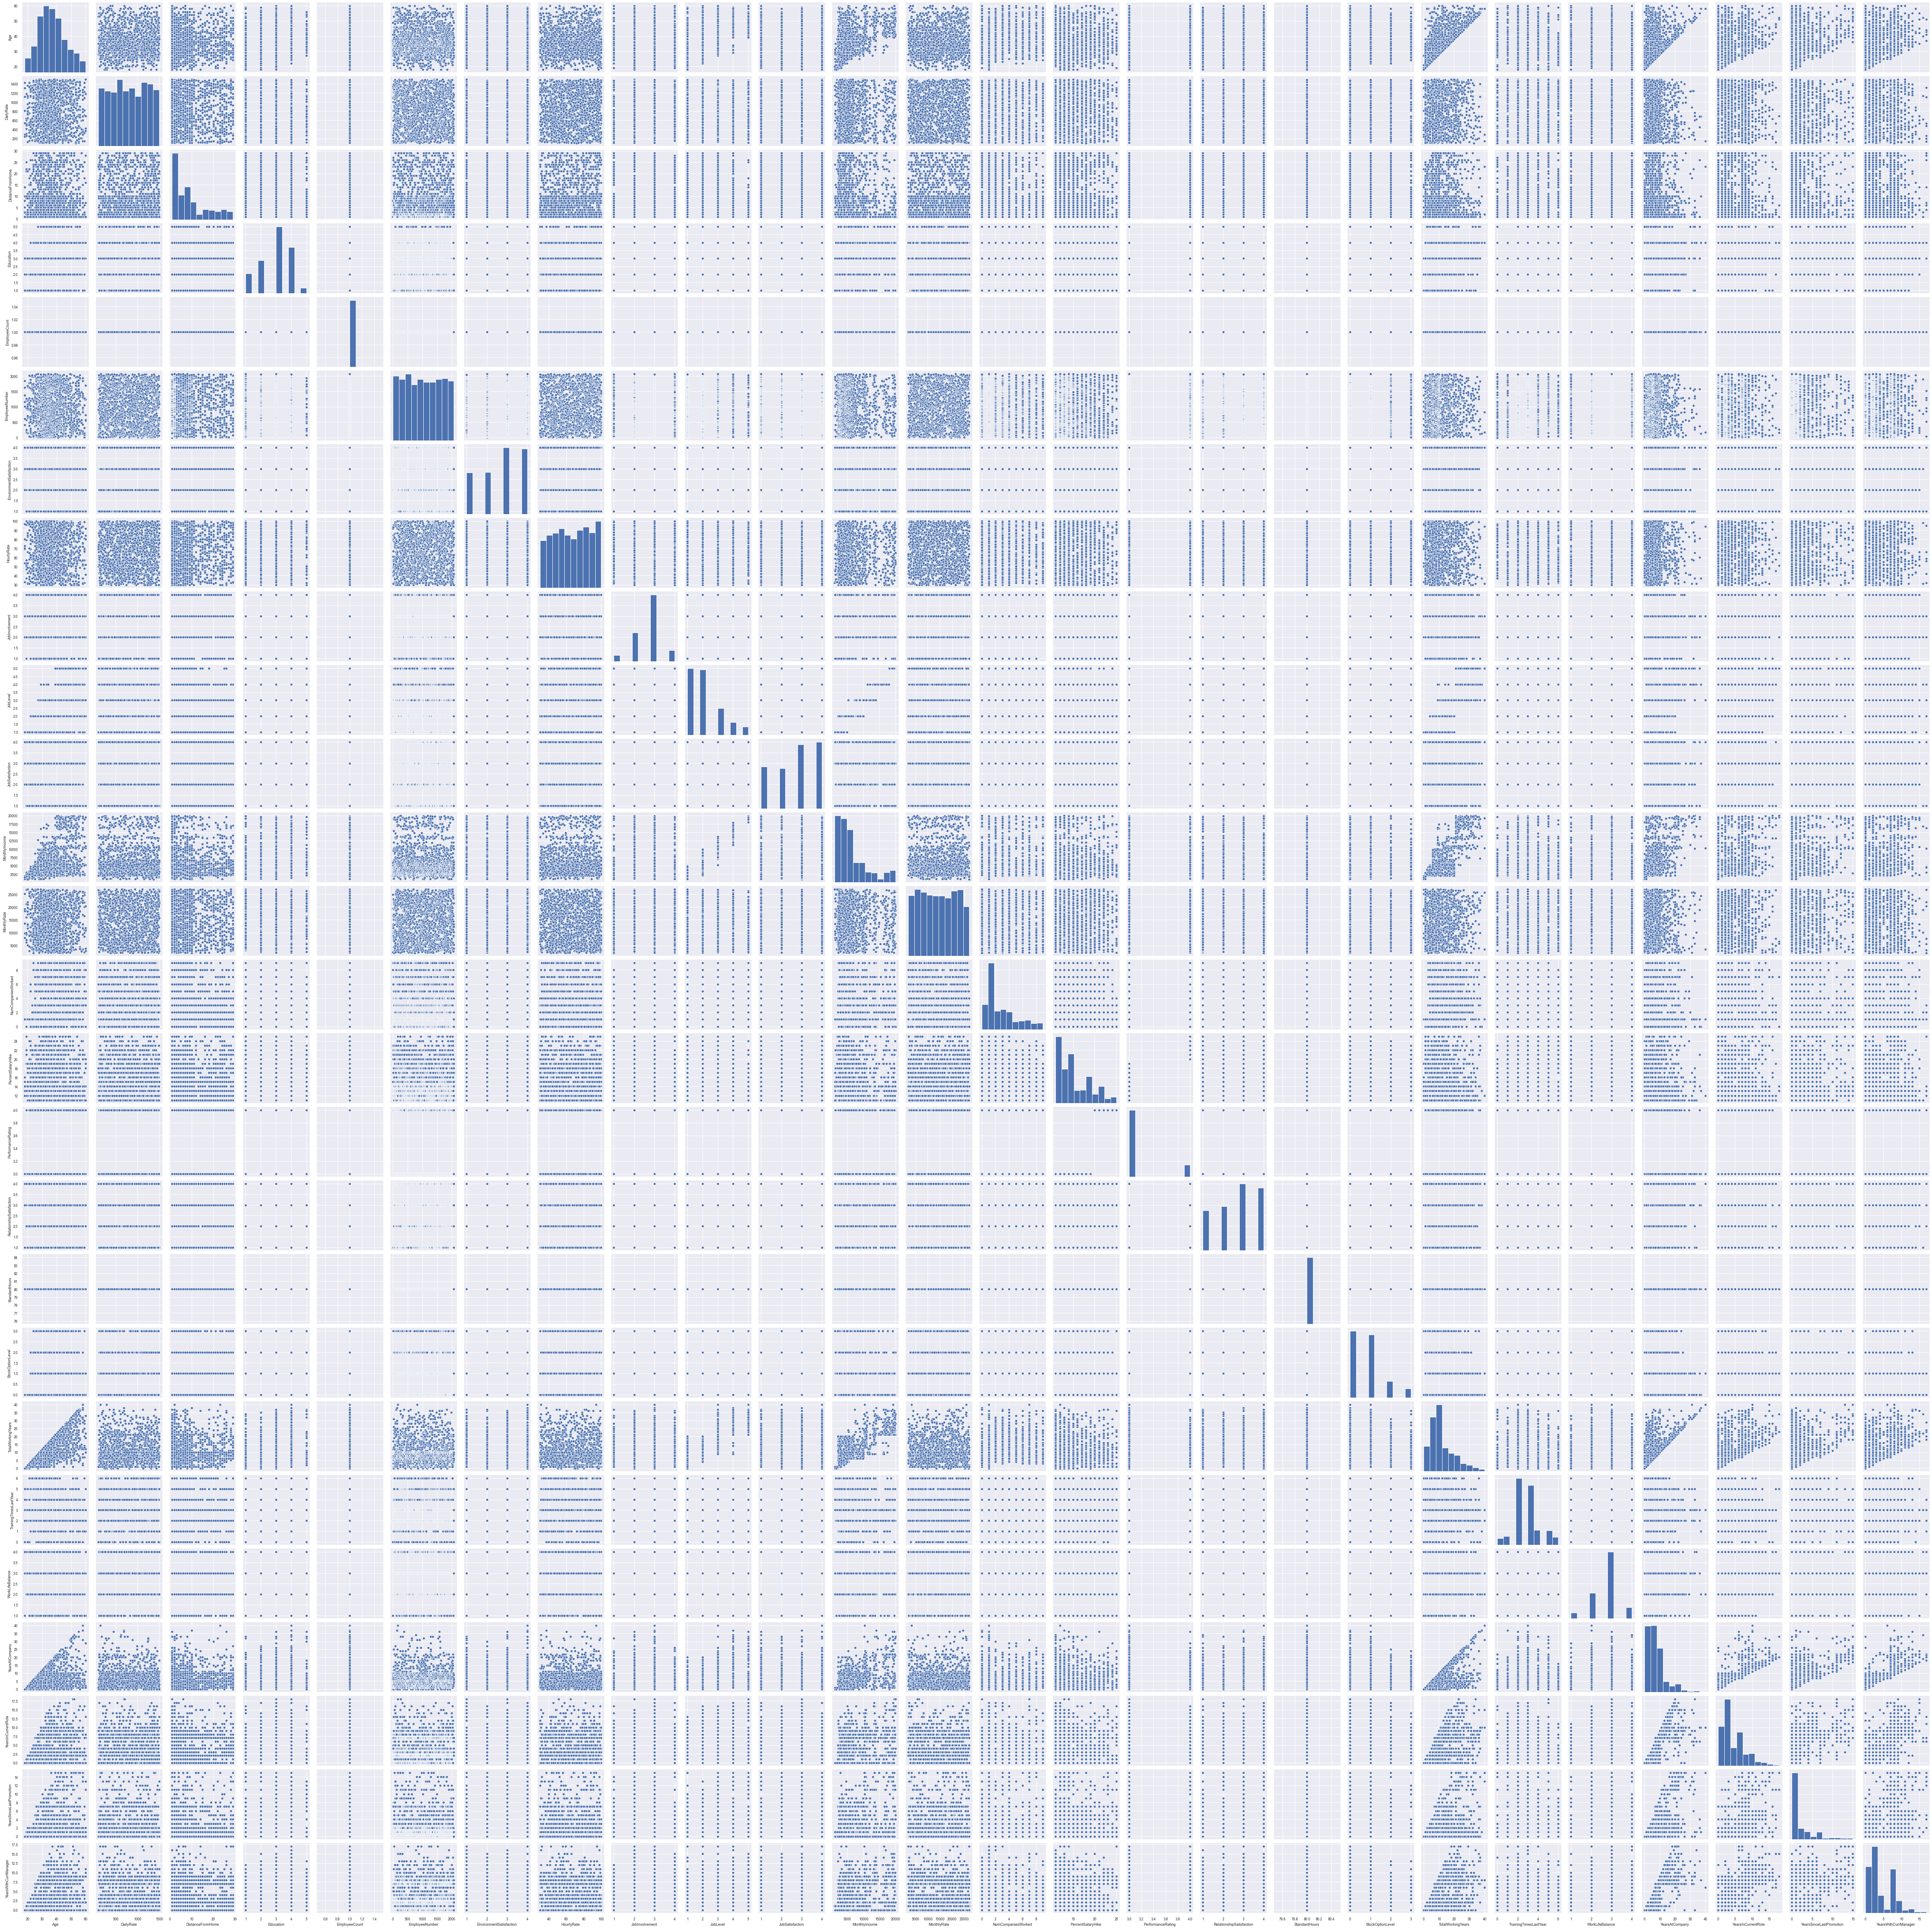

In [30]:
sns.pairplot(df)

We are going to drop the column StandardHours and EmployeeCount

In [31]:
df.drop('StandardHours',axis=1,inplace=True)
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)

### Changing categorical variables to numeric

We are going to transform categorical variable to numerical variables using the technique LabelEncoding.

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()
var1=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition']
for i in var1:
    df[i]=le.fit_transform(df[i])

In [34]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0             2               1               1                        2  ...   
1             1               1               2                        3  ...   
2             2               4               4                        4  ...   
3             4               1               5                        4  ...   
4             1               3               7                        1  ...   
...         ...             ...             ...                      ...  ...   
1465          2               3            2061                        3  ...   
1466          1               3            2062                        4  ...   
1467          3               1            2064                        2  ...   
1468          3               3            2065                        4  ...   
1469          3               3            2068                        2  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                 

## Checking Correlation between the variables

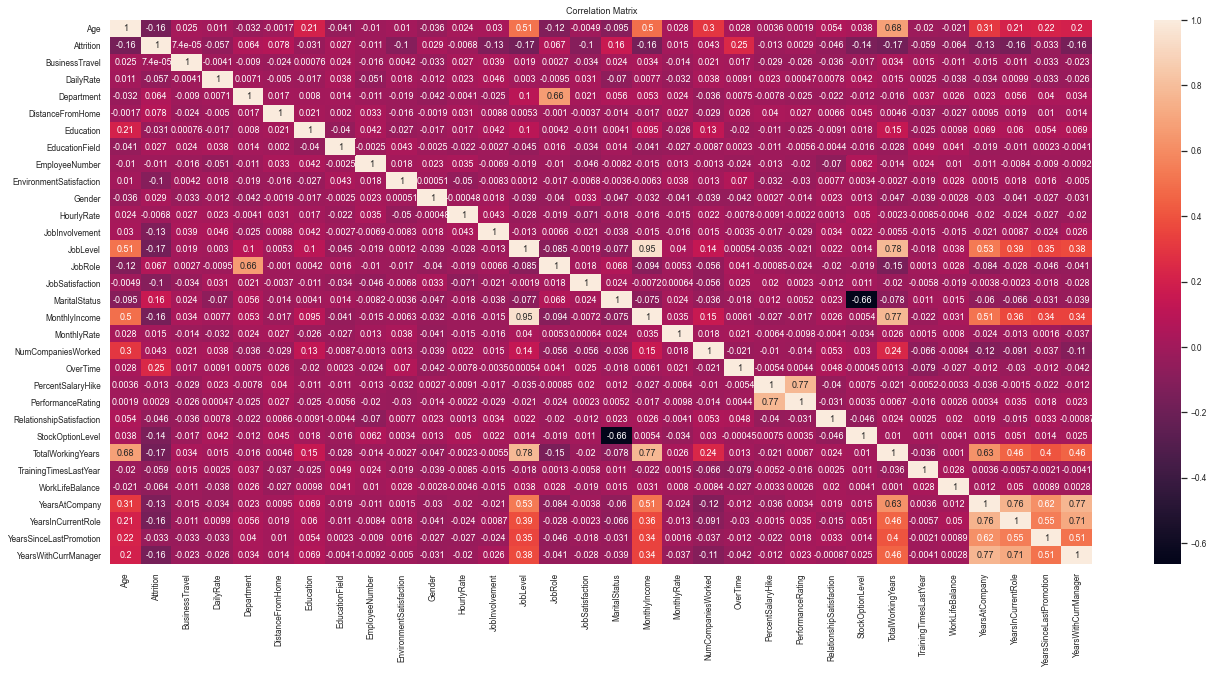

In [35]:
corr_mat=df.corr()
plt.figure(figsize=(22,10))
sns.set(font_scale=.75)
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [36]:
corr_matrix=df.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

* Marital status and over time have strong correlation with Attrition.Performance rating and business travel have lower correlation with the target variable Attrition.

### Conclusions from the above Visualization

* Most of the employees who are married are remaining in the company.The employees who are single leaving the company more comparing to others.

* Overtime is also a factor for attrition.

* Employees having less salary and less experiance in the company are also leaving the company more compared to those who have higher salary and years of experiance.

In [37]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

## Distribution of data among columns

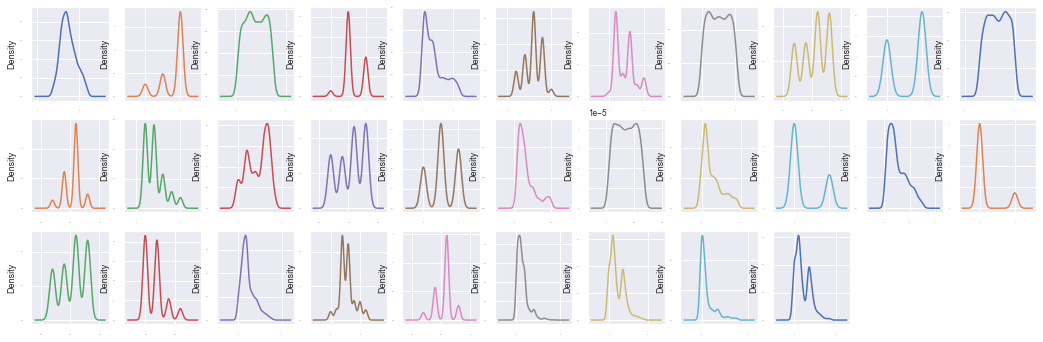

In [38]:
x.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

* We can see the skewness in some variables

## Checking Skewness

In [39]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

* The values above +.5 and -.5 indicates the skewness.
  we can find the skewness in the variables "Distance from home","job level","Monthly Income","Number of companies worked","Performance Rating","Total Working Years","Years at company","Years since last promotion","Stock option level","Years in current role","Percent Salary Hike"

## Removing Skewness

We are going to apply power tranform technique to remove the skewness.

In [40]:
from sklearn.preprocessing import power_transform

In [41]:
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [42]:
df_new.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EmployeeNumber             -0.288025
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
Y

In [43]:
x=df_new

## Checking Outliers

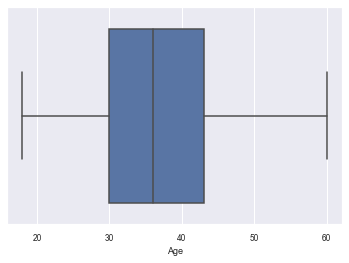

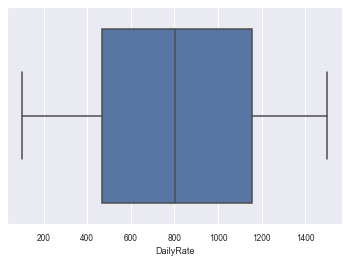

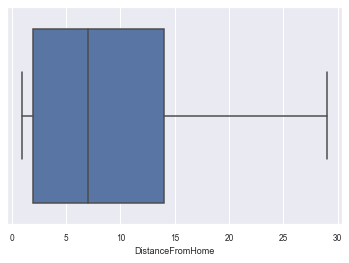

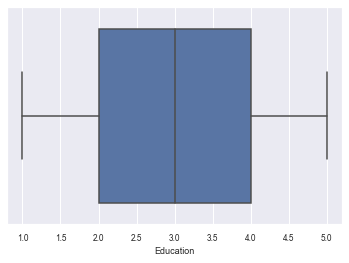

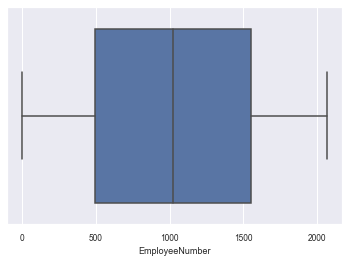

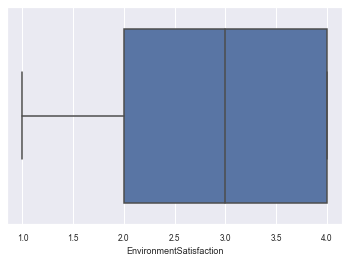

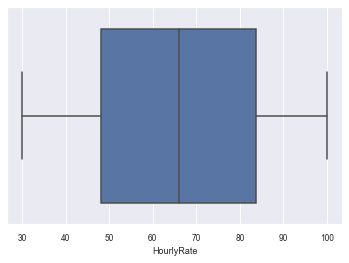

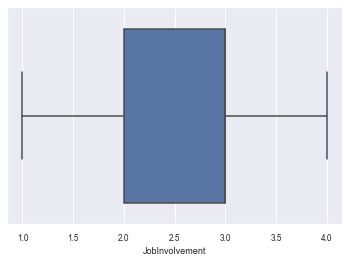

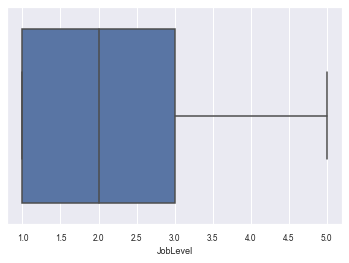

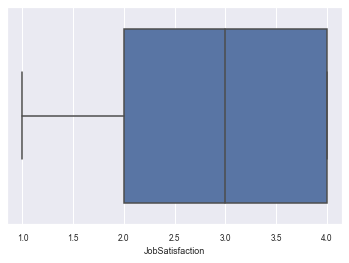

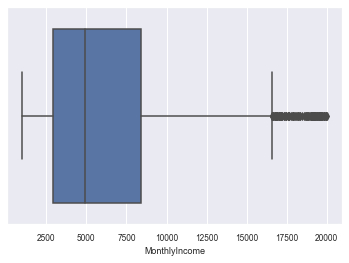

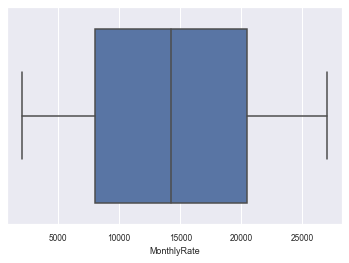

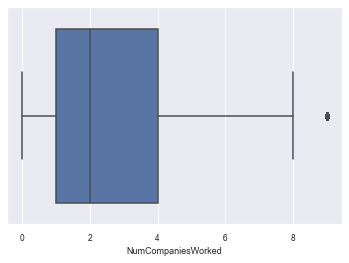

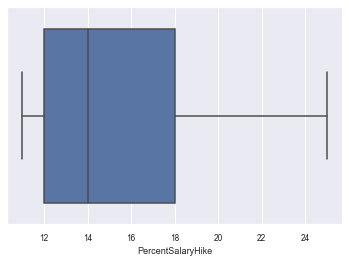

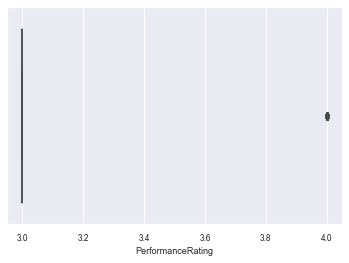

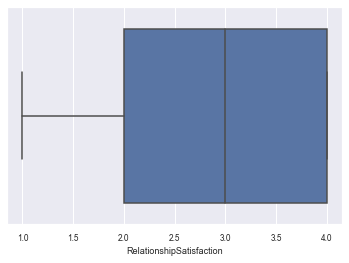

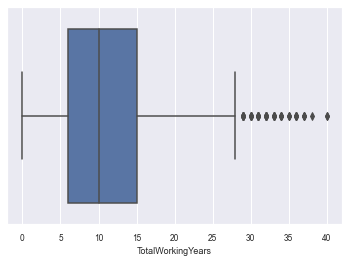

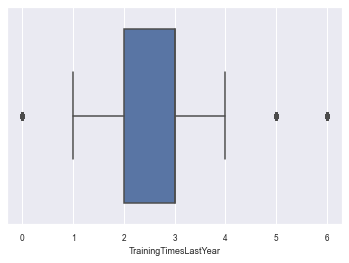

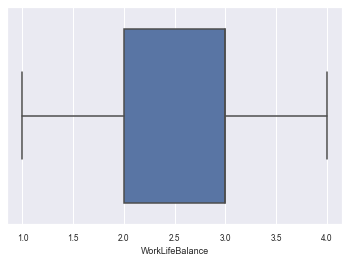

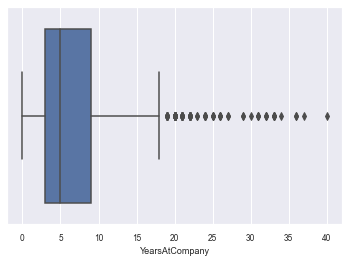

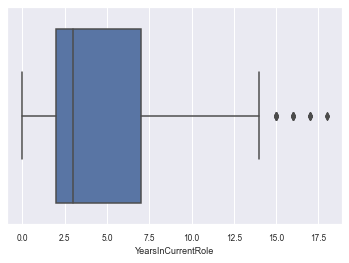

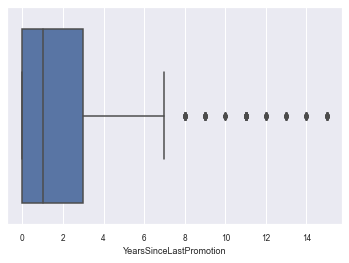

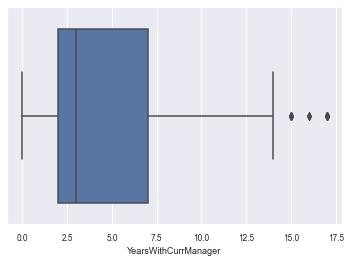

In [44]:
for i in ['Age','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']:
    sns.boxplot(df[i])
    plt.show()

* There are no considerable outliers in the dataset.

## Scaling using MinMax Scaler

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
mms=MinMaxScaler()

In [47]:
x=mms.fit_transform(x)

In [48]:
x

array([[0.65166406, 1.        , 0.76346238, ..., 0.4553291 , 0.        ,
        0.53483528],
       [0.81083496, 0.18276109, 0.17452262, ..., 0.62672869, 0.40787739,
        0.64479779],
       [0.56302291, 1.        , 0.92689926, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30433731, 1.        , 0.05720198, ..., 0.29052909, 0.        ,
        0.39245719],
       [0.81083496, 0.18276109, 0.71394436, ..., 0.575967  , 0.        ,
        0.69210668],
       [0.49163705, 1.        , 0.44896896, ..., 0.38074365, 0.40787739,
        0.29969255]])

## Finding Best Random State

In [49]:
maxAccu=0
MaxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.9160997732426304 on Random_state 123


## Creating Train_Test split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=123)

In [51]:
x_train.shape

(1029, 31)

In [52]:
x_test.shape

(441, 31)

In [53]:
y_train.shape

(1029,)

In [54]:
y_test.shape

(441,)

In [55]:
model=[LogisticRegression(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),GradientBoostingClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('For',m,':')
    print('Accuracy score:',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

For LogisticRegression() :
Accuracy score: 0.9160997732426304
[[380   4]
 [ 33  24]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       384
           1       0.86      0.42      0.56        57

    accuracy                           0.92       441
   macro avg       0.89      0.71      0.76       441
weighted avg       0.91      0.92      0.90       441



For KNeighborsClassifier() :
Accuracy score: 0.8752834467120182
[[375   9]
 [ 46  11]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       384
           1       0.55      0.19      0.29        57

    accuracy                           0.88       441
   macro avg       0.72      0.58      0.61       441
weighted avg       0.85      0.88      0.85       441



For SVC() :
Accuracy score: 0.9002267573696145
[[382   2]
 [ 42  15]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95  

## Cross Validation

In [56]:
for m in model:
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score of',m,'is:')
    print('Score:',scr)
    print('Cross validation score:',scr.mean())
    print('Standard Deviation:',scr.std())
    print('\n')
    

Cross validation score of LogisticRegression() is:
Score: [0.86734694 0.85714286 0.86734694 0.8707483  0.8877551 ]
Cross validation score: 0.8700680272108844
Standard Deviation: 0.009951523019270618


Cross validation score of KNeighborsClassifier() is:
Score: [0.85034014 0.83673469 0.83673469 0.84693878 0.8537415 ]
Cross validation score: 0.8448979591836736
Standard Deviation: 0.007003830027882276


Cross validation score of SVC() is:
Score: [0.86394558 0.84353741 0.87755102 0.86054422 0.88095238]
Cross validation score: 0.8653061224489796
Standard Deviation: 0.013365226329515966


Cross validation score of RandomForestClassifier() is:
Score: [0.85034014 0.86054422 0.8707483  0.84693878 0.8537415 ]
Cross validation score: 0.8564625850340135
Standard Deviation: 0.008441954861218254


Cross validation score of GradientBoostingClassifier() is:
Score: [0.84693878 0.85714286 0.87414966 0.86054422 0.85714286]
Cross validation score: 0.8591836734693876
Standard Deviation: 0.00876469301137761

## AUC-ROC Curve

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

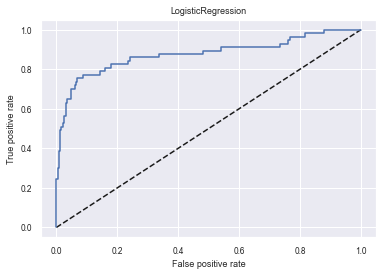

auc score 0.6715323464912281


In [58]:
y_pred_prob=LR.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()
auc_score=roc_auc_score(y_test,LR.predict(x_test)) 
print("auc score",auc_score)

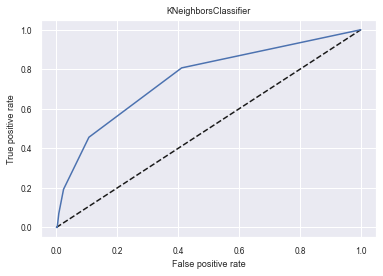

auc score 0.5847724780701754


In [59]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred_prob=knc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
auc_score=roc_auc_score(y_test,knc.predict(x_test)) 
print("auc score",auc_score)

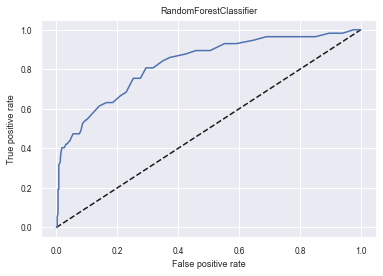

auc score 0.6013569078947368


In [60]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test)) 
print("auc score",auc_score)

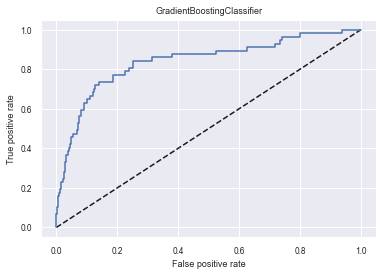

auc score 0.6510416666666666


In [61]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
auc_score=roc_auc_score(y_test,gb.predict(x_test)) 
print("auc score",auc_score)

#### Since the difference between the accuracy score and cross validation score is minimum,Our best model is GradientBoostingClassifier().

## Hyper Parameter Tuning

In [62]:
# Creating parameter list to pass in gridsearchCV
parameters={'criterion':['mse','mae'],'max_depth':[1,10],'n_estimators':[1,100],'max_features':['auto','sqrt','log2']}

In [63]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [64]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [65]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'log2',
 'n_estimators': 100}

In [66]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [67]:
accuracy_score(y_test,GCV_pred)

0.8934240362811792

## Saving the Best model

In [68]:
import pickle
filename='HRanalytics.pkl'
pickle.dump(GCV.best_estimator_,open('HRanalytics.pkl','wb'))

## Conclusion

In [69]:
loaded_model=pickle.load(open('HRanalytics.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8934240362811792


In [70]:
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
df_con=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))

In [71]:
df_con

Original  Predicted
0           1          1
1           0          0
2           0          0
3           0          0
4           0          0
..        ...        ...
436         0          0
437         0          0
438         1          0
439         0          0
440         0          0

[441 rows x 2 columns]